In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


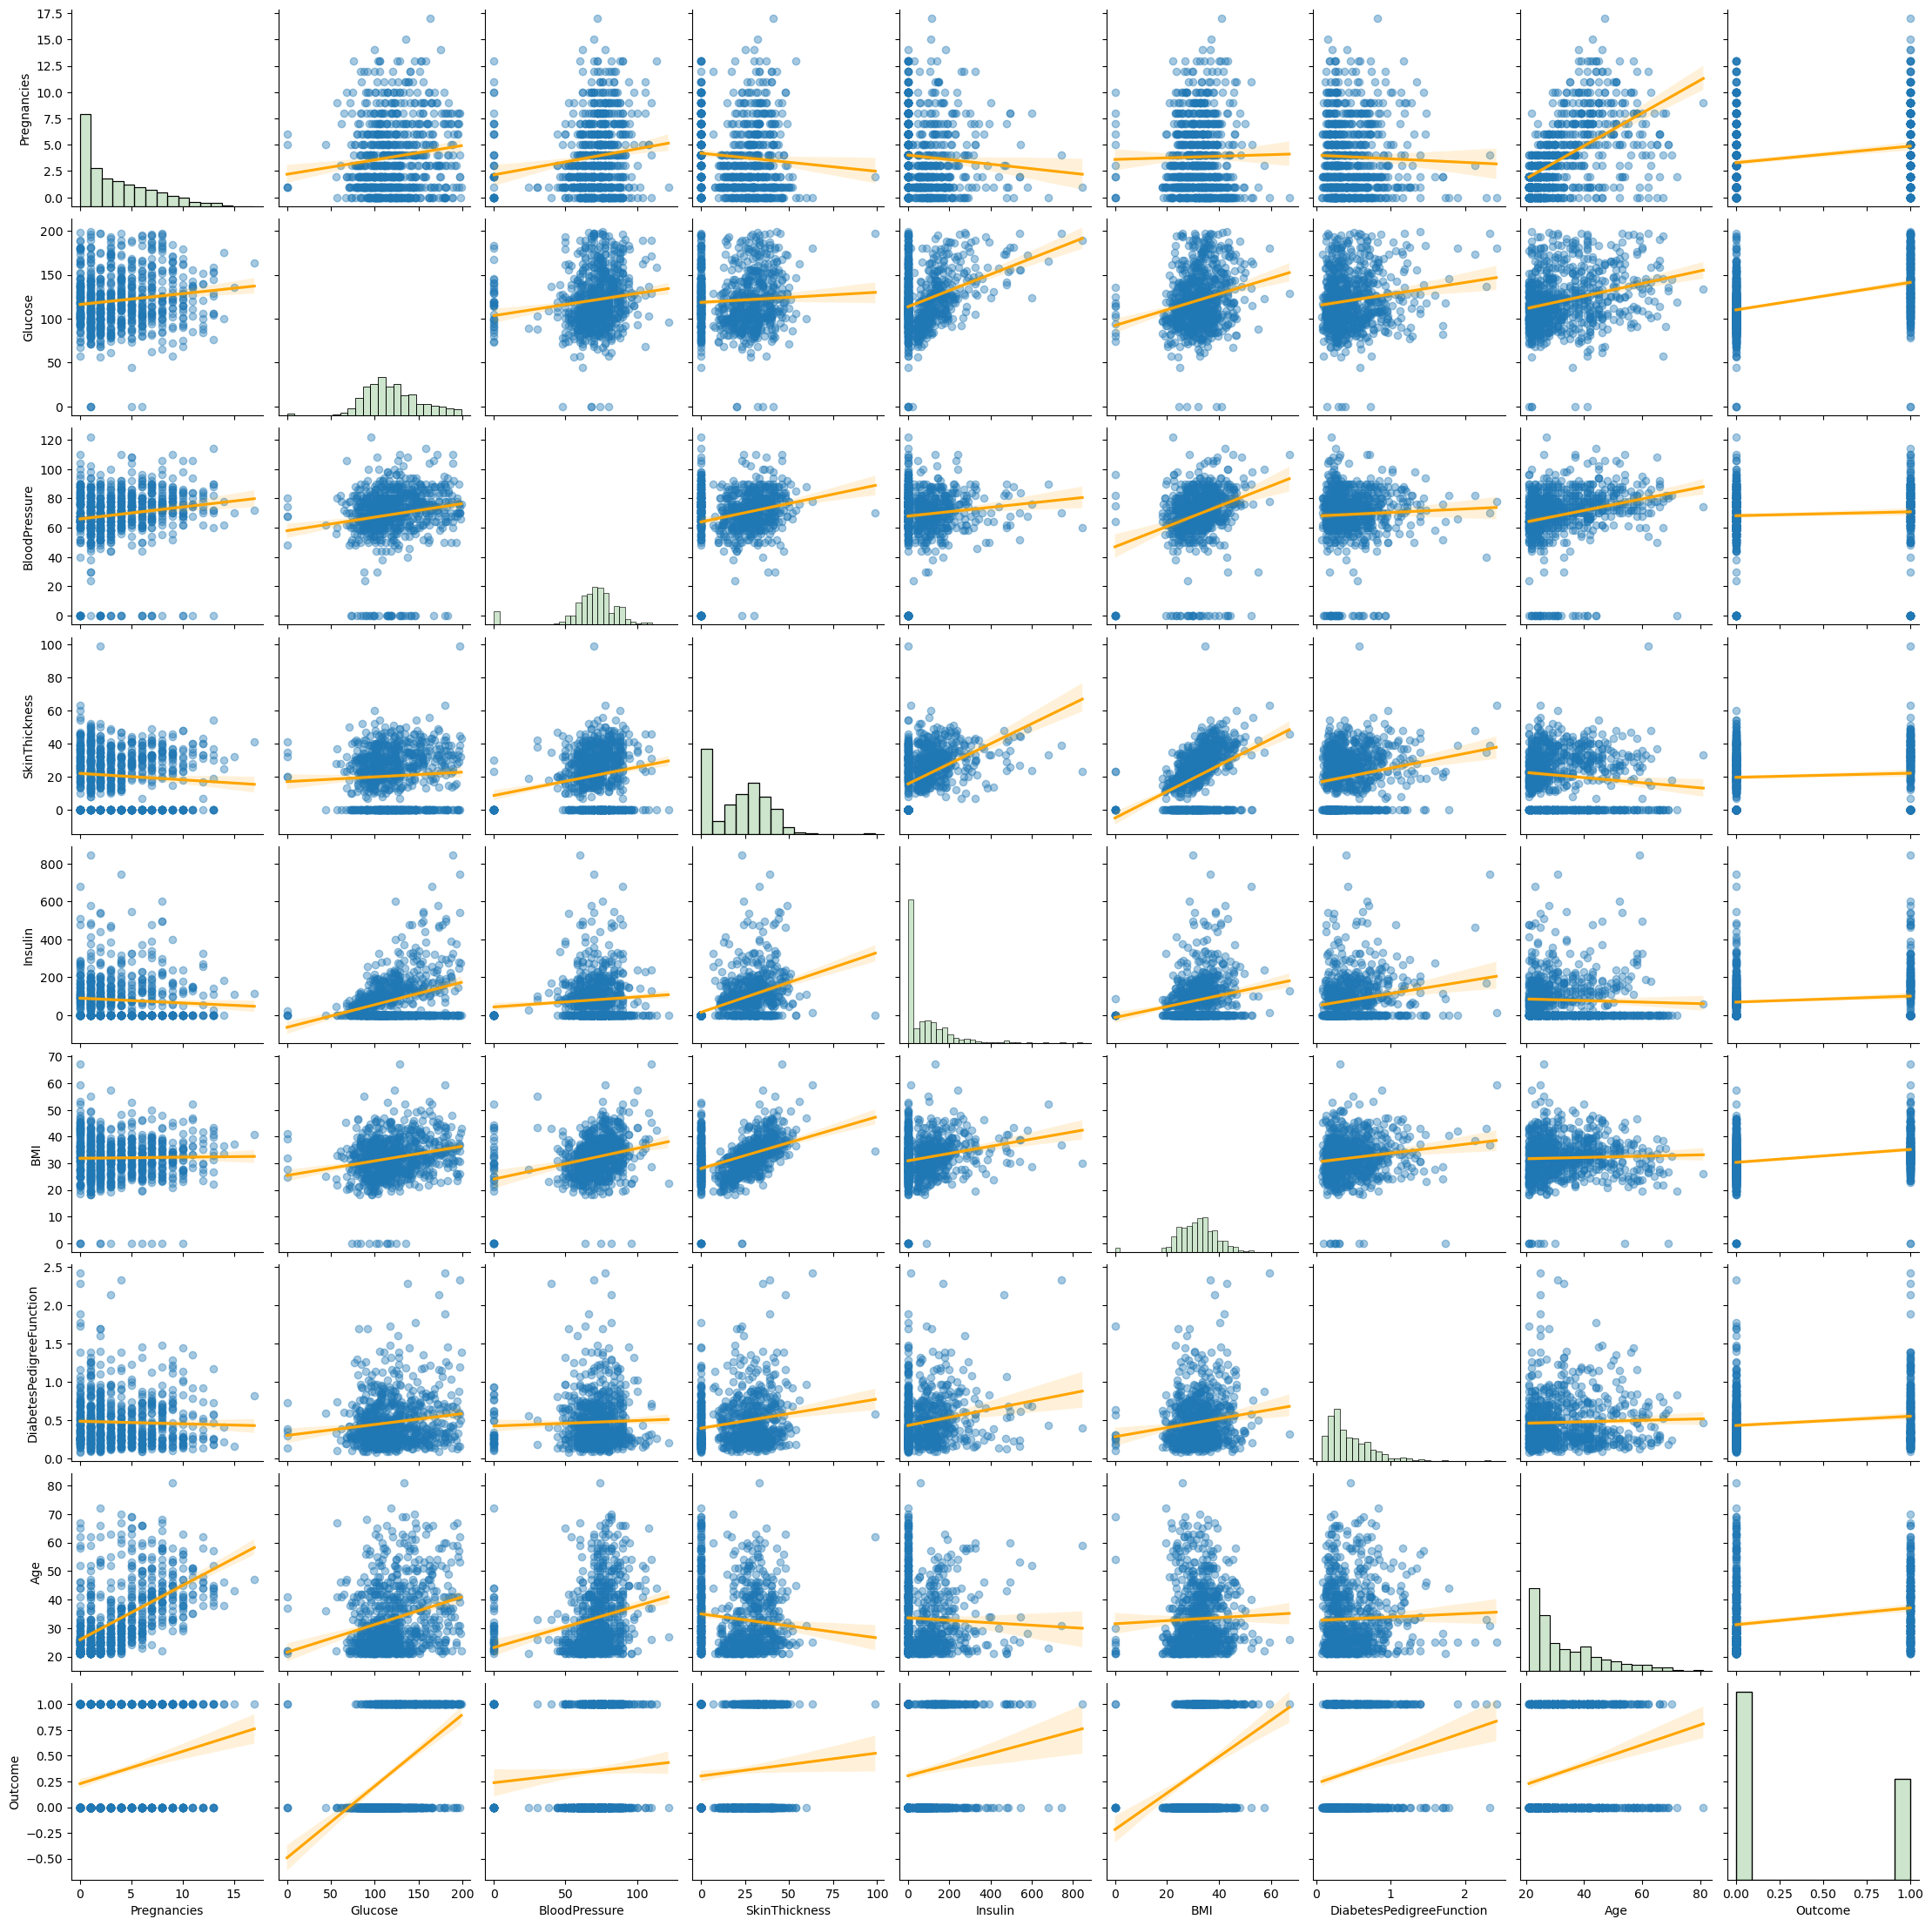

In [13]:
sns.pairplot(df,kind='reg',
            plot_kws={'scatter_kws':{'alpha':0.4},
                     'line_kws':{'color':'orange'}},
            diag_kws={'color':'green','alpha':.2})

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [64]:
#model = RandomForestClassifier(n_estimators=250,random_state=7)
#model = ExtraTreesClassifier(n_estimators=250,random_state=7)
model = DecisionTreeClassifier(random_state=7)
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
model.fit(X,y)

DecisionTreeClassifier(random_state=7)

In [65]:
model.feature_importances_ #ทุกตัว รวมกันได้เท่ากับ 1 

array([0.05410434, 0.31816043, 0.1153007 , 0.01446441, 0.02780768,
       0.2304674 , 0.13514532, 0.10454973])

In [66]:
fs = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
fs

SkinThickness               0.014464
Insulin                     0.027808
Pregnancies                 0.054104
Age                         0.104550
BloodPressure               0.115301
DiabetesPedigreeFunction    0.135145
BMI                         0.230467
Glucose                     0.318160
dtype: float64

<AxesSubplot:>

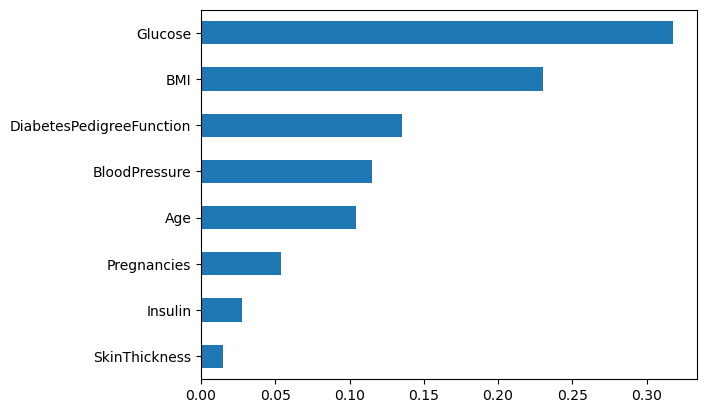

In [67]:
fs.plot(kind='barh')

In [68]:
fs[fs>.1]

Age                         0.104550
BloodPressure               0.115301
DiabetesPedigreeFunction    0.135145
BMI                         0.230467
Glucose                     0.318160
dtype: float64

In [69]:
fs.nlargest(5).index # เอา 4 ค่าแรกที่มากที่สุด

Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'Age'], dtype='object')

In [70]:
X = df[fs.nlargest(5).index]
y = df['Outcome']

In [71]:
test_size=.3
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=test_size,stratify=y,random_state=7) #stratify คือทำให้สัดส่วนของ 1 กับ 0 เท่าๆกัน

In [72]:
algo = [
    [KNeighborsClassifier(n_neighbors=5),'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'),'LogisticRegression'],
    [Perceptron(),'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10),'DecisionTreeClassifier'],
    [GradientBoostingClassifier(),'GradientBoostingClassifier'],
    [RandomForestClassifier(),'RandomForestClassifier'],
    [AdaBoostClassifier(),'AdaBoostClassifier'],
    [GaussianNB(),'GaussianNB'],
    [MLPClassifier(),'MLPClassifier'],
    [SVC(kernel='linear'),'SVC_linear'],
    [GaussianProcessClassifier(),'GaussianProcessClassifier']
]
model_scores = []
for a in algo:
    model = a[0]
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    model_scores.append([score,a[1]])
    y_pred = model.predict(x_test)
    print(f'{a[1]:20} score:{score:.04f}')
    print(metrics.confusion_matrix(y_test,y_pred))
    print(metrics.classification_report(y_test,y_pred))
    print('-'*100)

#print(model_scores)
print(f'best score = {max(model_scores)}')

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier score:0.7446
[[125  25]
 [ 34  47]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

----------------------------------------------------------------------------------------------------
LogisticRegression   score:0.7749
[[136  14]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.75      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

----------------------------------------------------------------------------------------------------
Perceptron           score:0.5

In [73]:
dscore = pd.DataFrame(model_scores,columns=['score','classifier'])
dscore.sort_values('score',ascending=False)

,score,classifier
7,0.787879,GaussianNB
9,0.783550,SVC_linear
1,0.774892,LogisticRegression
4,0.757576,GradientBoostingClassifier
6,0.757576,AdaBoostClassifier
0,0.744589,KNeighborsClassifier
5,0.731602,RandomForestClassifier
3,0.727273,DecisionTreeClassifier
10,0.714286,GaussianProcessClassifier
8,0.701299,MLPClassifier
